#**Trabalhando com Planilhas do Excel**

In [64]:
import warnings
# suprimindo future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Importando a biblioteca
import pandas as pd

In [65]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [66]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [67]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [68]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [69]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [70]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
74,Recife,2019-01-01,38.79,983,6
86,Aracaju,2018-01-01,154.92,1521,5
24,Aracaju,2018-01-01,151.04,1522,6
138,Fortaleza,2019-03-02,150.38,983,6
90,Natal,2019-01-02,100.54,1036,2


In [71]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [72]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [73]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [74]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Tratando valores faltantes**

In [75]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [76]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [77]:
df["Vendas"].mean()

122.61180089485438

In [78]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [79]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
20,Salvador,2019-01-01,33.97,1034,3
37,Aracaju,2018-01-01,152.74,1522,9
71,Natal,2019-03-20,840.00,854,3
4,Salvador,2019-02-14,19.47,1037,3
59,Recife,2019-01-01,89.39,983,5
68,Fortaleza,2019-01-01,85.09,1005,6
147,Natal,2019-01-02,34.50,1035,1
33,Fortaleza,2019-01-01,19.56,1005,1
117,Natal,2019-01-02,39.41,1034,1
88,Aracaju,2018-01-01,190.67,1521,5


In [80]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [81]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [82]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [83]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [84]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [85]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [86]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 

In [87]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [88]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [89]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [90]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [91]:
#nsamllest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [92]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [93]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


#**Trabalhando com datas**

In [94]:
#Trasnformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [95]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [96]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [97]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [98]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [99]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [100]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,2019
33,Salvador,2019-01-01,144.19,1035,2,288.38,2.0,2019
211,Salvador,2019-01-02,141.05,1035,3,423.15,3.0,2019
94,Fortaleza,2019-01-01,150.49,1003,5,752.45,5.0,2019
160,Salvador,2019-01-02,11.76,1034,1,11.76,1.0,2019


In [101]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [102]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
52,Recife,2019-01-01,11.87,981,6,71.22,6.0,2019,1,1
20,Recife,2019-01-01,42.35,982,3,127.05,3.0,2019,1,1
44,Natal,2019-01-03,500.00,852,4,2000.00,4.0,2019,1,3
103,Natal,2019-01-02,191.60,1034,1,191.60,1.0,2019,1,2
209,Natal,2019-01-02,69.98,1034,2,139.96,2.0,2019,1,2


In [103]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [104]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [105]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days
26,Aracaju,2018-01-01,6.98,1521,10,69.80,10.0,2018,1,1,0 days
104,Natal,2019-01-02,188.79,1036,3,566.37,3.0,2019,1,2,366 days
103,Recife,2019-01-01,41.65,982,3,124.95,3.0,2019,1,1,365 days
18,Fortaleza,2019-01-01,38.31,1002,3,114.93,3.0,2019,1,1,365 days


In [106]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [107]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
232,Natal,2019-01-03,167.76,1034,3,503.28,3.0,2019,1,3,367 days,1
77,Recife,2019-01-01,102.82,981,6,616.92,6.0,2019,1,1,365 days,1
139,Fortaleza,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,1
151,Natal,2019-01-02,14.63,1035,1,14.63,1.0,2019,1,2,366 days,1
78,Salvador,2019-01-01,111.20,1036,3,333.60,3.0,2019,1,1,365 days,1


In [108]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [109]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
120,Recife,2019-03-02,184.90,982,4,739.60,4.0,2019,3,2,425 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
120,Salvador,2019-03-02,140.17,1036,2,280.34,2.0,2019,3,2,425 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
131,Salvador,2019-03-02,63.48,1037,3,190.44,3.0,2019,3,2,425 days,1
131,Fortaleza,2019-03-02,139.07,982,6,834.42,6.0,2019,3,2,425 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,3.0,2019,3,2,425 days,1
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days,1


#**Visualização de dados**

In [110]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

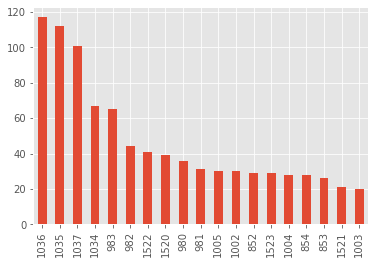

In [111]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

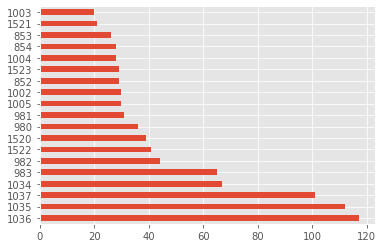

In [112]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

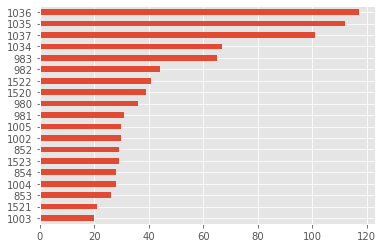

In [113]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

<AxesSubplot:ylabel='Receita'>

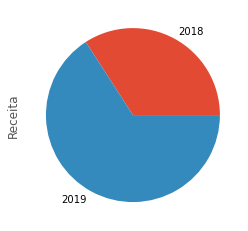

In [114]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [115]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

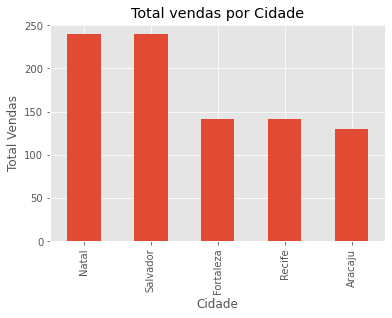

In [116]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

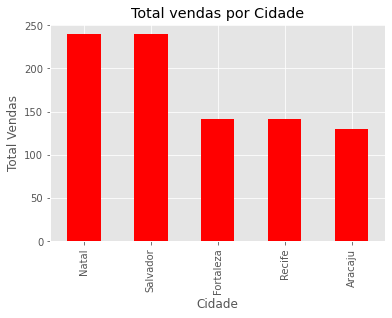

In [117]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [118]:
#Alterando o estilo
plt.style.use("ggplot")

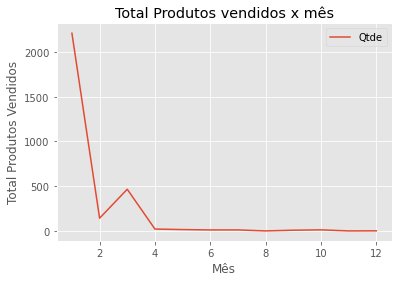

In [119]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [120]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [121]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [122]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

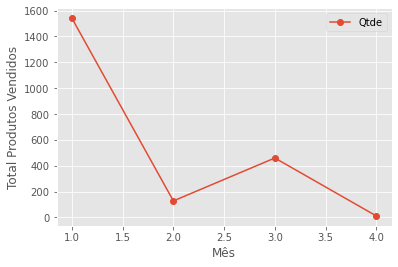

In [123]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

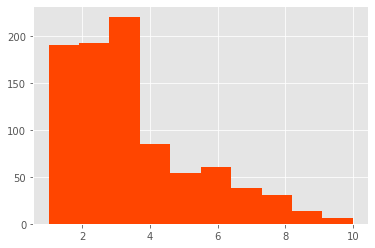

In [124]:
#Hisograma
plt.hist(df["Qtde"], color="orangered");

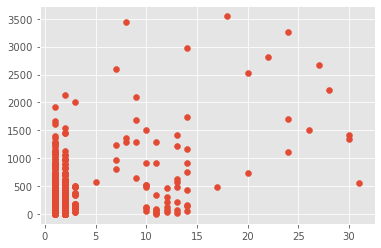

In [125]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

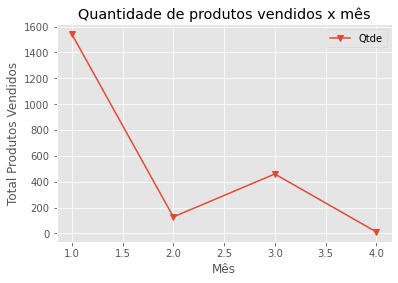

In [126]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")